In [2]:
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
from tensorflow import keras # for building Neural Networks

# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
import sklearn # for model evaluation
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Other utilities
import sys
import os

from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [3]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../data/seg_train/seg_train', '../data/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
from tqdm import tqdm
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|          | 1/2404 [00:00<06:10,  6.49it/s]

Loading ../data/seg_train/seg_train


  2%|▏         | 10/553 [00:00<00:05, 97.32it/s]

Loading ../data/seg_test/seg_test


100%|██████████| 525/525 [00:01<00:00, 356.16it/s]


In [6]:
#with open('train.npy', 'wb') as f:
  #  np.save(f, train_images)
#with open('train_label.npy', 'wb') as f:
#    np.save(f, train_labels)
#with open('test.npy', 'wb') as f:
#    np.save(f, test_images)
#with open('test_label.npy', 'wb') as f:
#    np.save(f, test_labels)

In [7]:
#with open('train.npy', 'rb') as f:
 #   train_images = np.load(f)
#with open('train_label.npy', 'rb') as f:
#    train_labels = np.load(f)
#with open('test.npy', 'rb') as f:
#    test_images = np.load(f)
#with open('test_label.npy', 'rb') as f:
 #   test_labels = np.load(f)

In [8]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [9]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


In [10]:
train_images.shape

(14034, 150, 150, 3)

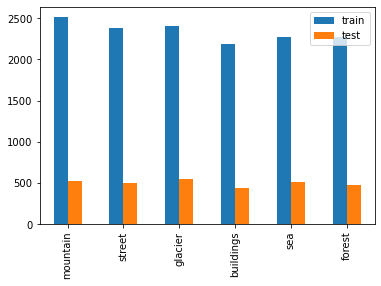

In [11]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

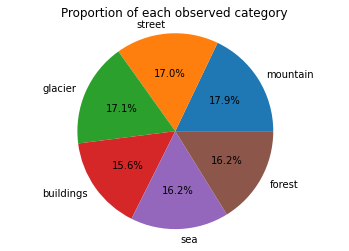

In [12]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
train_images.shape

(14034, 150, 150, 3)

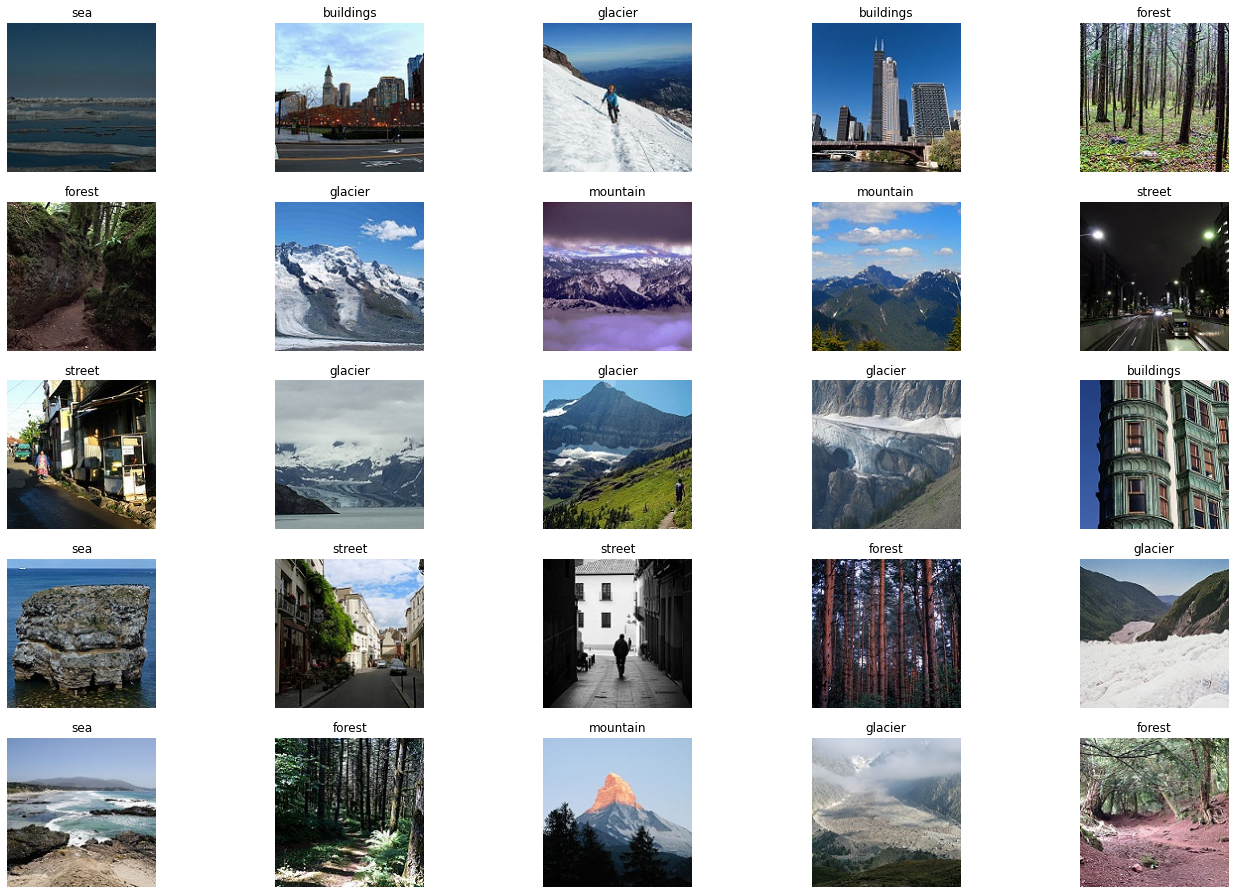

In [15]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_images))
        ax[i,j].imshow(train_images[rnd_number])
        ax[i,j].set_title(class_names[train_labels[rnd_number]])
        ax[i,j].axis('off')

In [16]:
train_images = train_images.reshape(train_images.shape[0], 150*150*3)
test_images = test_images.reshape(test_images.shape[0], 150*150*3)

In [17]:
from tensorflow.keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels, 6)
test_labels_one_hot = to_categorical(test_labels, 6)

In [18]:
train_images.shape

(14034, 67500)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4320064   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 4,324,614
Trainable params: 4,324,614
Non-trainable params: 0
_________________________________________________________________


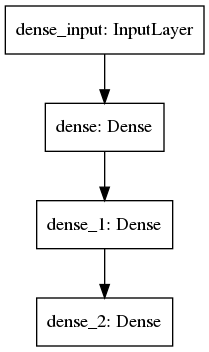

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_images.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')
#SVG(model_to_dot(model).create(prog='dot', format='svg'))
#Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [20]:
history = model.fit(train_images, train_labels_one_hot, batch_size=32, epochs=100, verbose=1, validation_split=0.3,
                    shuffle=True, callbacks=[callback, mc])

Epoch 1/100
307/307 [==============================] - 12s 34ms/step - loss: 2.5238 - accuracy: 0.3929 - precision: 0.4680 - recall: 0.2930 - val_loss: 1.6019 - val_accuracy: 0.4381 - val_precision: 0.6107 - val_recall: 0.2738

Epoch 00001: val_accuracy improved from -inf to 0.43814, saving model to best_model.h5
Epoch 2/100
307/307 [==============================] - 10s 31ms/step - loss: 1.4595 - accuracy: 0.4604 - precision: 0.5988 - recall: 0.2972 - val_loss: 1.6082 - val_accuracy: 0.4545 - val_precision: 0.5444 - val_recall: 0.3496

Epoch 00002: val_accuracy improved from 0.43814 to 0.45452, saving model to best_model.h5
Epoch 3/100
307/307 [==============================] - 10s 32ms/step - loss: 1.3307 - accuracy: 0.4992 - precision: 0.6543 - recall: 0.3186 - val_loss: 1.5712 - val_accuracy: 0.4004 - val_precision: 0.6032 - val_recall: 0.2353

Epoch 00003: val_accuracy did not improve from 0.45452
Epoch 4/100
307/307 [==============================] - 10s 33ms/step - loss: 1.3556 

In [24]:
best_model = keras.models.load_model("best_model.h5")

In [25]:
[test_loss, test_acc, test_precision, test_recall] = best_model.evaluate(test_images, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

94/94 [==============================] - 2s 14ms/step - loss: 1.2364 - accuracy: 0.5270 - precision: 0.6977 - recall: 0.3547
Evaluation result on Test Data : Loss = 1.2364429235458374, accuracy = 0.5270000100135803


Text(0.5, 1.0, 'Accuracy Curves')

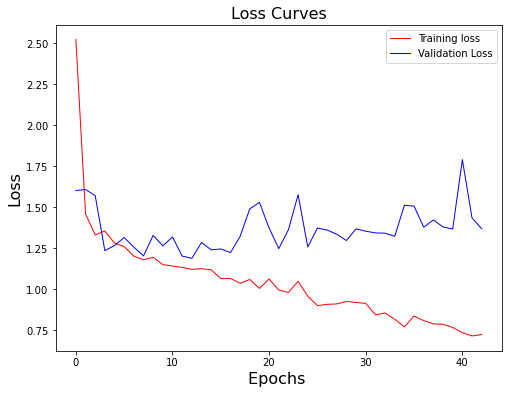

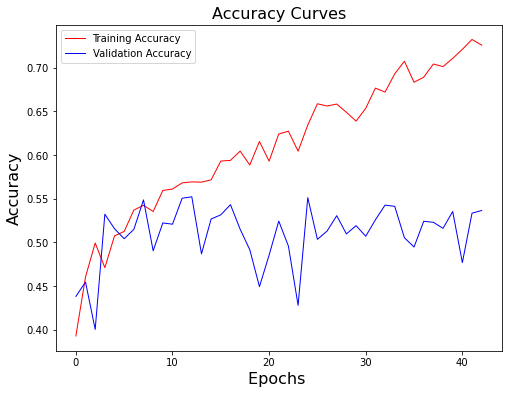

In [26]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=1.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

### With Batch Size =256

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(train_images.shape[1],)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(6, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history2 = model2.fit(train_images, train_labels_one_hot, batch_size=256, epochs=100, verbose=1, validation_split=0.3,
                    shuffle=True, callbacks=[callback, mc])

Epoch 1/100
39/39 [==============================] - 6s 126ms/step - loss: 12.8146 - accuracy: 0.2276 - precision: 0.2304 - recall: 0.2008 - val_loss: 1.8489 - val_accuracy: 0.3448 - val_precision: 0.4201 - val_recall: 0.2460

Epoch 00001: val_accuracy improved from -inf to 0.34481, saving model to best_model.h5
Epoch 2/100
39/39 [==============================] - 4s 100ms/step - loss: 1.6332 - accuracy: 0.4093 - precision: 0.5197 - recall: 0.2480 - val_loss: 1.4112 - val_accuracy: 0.4616 - val_precision: 0.6955 - val_recall: 0.2213

Epoch 00002: val_accuracy improved from 0.34481 to 0.46165, saving model to best_model.h5
Epoch 3/100
39/39 [==============================] - 4s 101ms/step - loss: 1.3158 - accuracy: 0.5054 - precision: 0.7182 - recall: 0.2612 - val_loss: 1.3532 - val_accuracy: 0.4695 - val_precision: 0.6648 - val_recall: 0.2596

Epoch 00003: val_accuracy improved from 0.46165 to 0.46948, saving model to best_model.h5
Epoch 4/100
39/39 [==============================] - 4

39/39 [==============================] - 4s 101ms/step - loss: 0.9638 - accuracy: 0.6431 - precision: 0.7540 - recall: 0.5095 - val_loss: 1.3351 - val_accuracy: 0.5300 - val_precision: 0.6757 - val_recall: 0.4137

Epoch 00029: val_accuracy did not improve from 0.55355
Epoch 30/100
39/39 [==============================] - 4s 100ms/step - loss: 0.8768 - accuracy: 0.6807 - precision: 0.8091 - recall: 0.5299 - val_loss: 1.2417 - val_accuracy: 0.5509 - val_precision: 0.6824 - val_recall: 0.3887

Epoch 00030: val_accuracy did not improve from 0.55355
Epoch 31/100
39/39 [==============================] - 4s 100ms/step - loss: 0.9852 - accuracy: 0.6422 - precision: 0.7449 - recall: 0.5166 - val_loss: 1.8152 - val_accuracy: 0.4070 - val_precision: 0.4392 - val_recall: 0.3595

Epoch 00031: val_accuracy did not improve from 0.55355
Epoch 32/100
39/39 [==============================] - 4s 104ms/step - loss: 1.2279 - accuracy: 0.5599 - precision: 0.6554 - recall: 0.4602 - val_loss: 1.2771 - val_acc

In [20]:
best_model = keras.models.load_model("best_model.h5")

In [22]:
[test_loss, test_acc, test_precision, test_recall] = best_model.evaluate(test_images, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

94/94 [==============================] - 1s 9ms/step - loss: 1.3314 - accuracy: 0.5413 - precision: 0.6507 - recall: 0.4353
Evaluation result on Test Data : Loss = 1.3314341306686401, accuracy = 0.5413333177566528


Text(0.5, 1.0, 'Accuracy Curves')

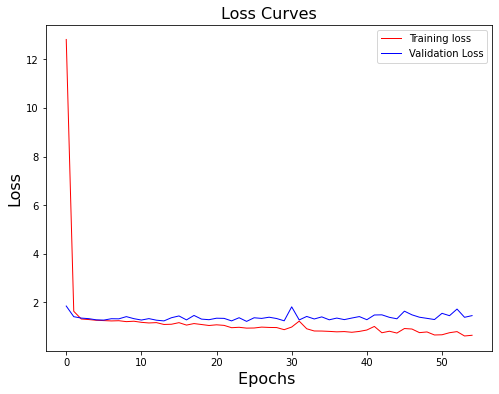

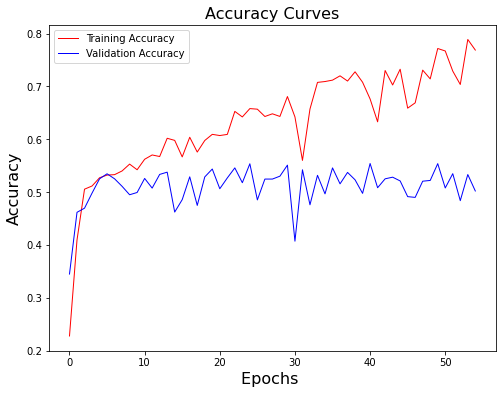

In [24]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=1.0)
plt.plot(history2.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history2.history['accuracy'],'r',linewidth=1.0) 
plt.plot(history2.history['val_accuracy'],'b',linewidth=1.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

## RMSprop Optimizer

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(train_images.shape[1],)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(6, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history2 = model2.fit(train_images, train_labels_one_hot, batch_size=256, epochs=100, verbose=1, validation_split=0.3,
                    shuffle=True, callbacks=[callback, mc])

Epoch 1/100
39/39 [==============================] - 9s 154ms/step - loss: 15.9552 - accuracy: 0.1969 - precision: 0.2009 - recall: 0.1822 - val_loss: 8.1807 - val_accuracy: 0.2042 - val_precision: 0.2102 - val_recall: 0.1988

Epoch 00001: val_accuracy improved from -inf to 0.20423, saving model to best_model.h5
Epoch 2/100
39/39 [==============================] - 5s 126ms/step - loss: 5.8402 - accuracy: 0.2285 - precision: 0.2345 - recall: 0.2031 - val_loss: 4.6488 - val_accuracy: 0.2341 - val_precision: 0.2350 - val_recall: 0.2090

Epoch 00002: val_accuracy improved from 0.20423 to 0.23415, saving model to best_model.h5
Epoch 3/100
39/39 [==============================] - 5s 124ms/step - loss: 3.5529 - accuracy: 0.2549 - precision: 0.2869 - recall: 0.2056 - val_loss: 4.0560 - val_accuracy: 0.2064 - val_precision: 0.2174 - val_recall: 0.1757

Epoch 00003: val_accuracy did not improve from 0.23415
Epoch 4/100
39/39 [==============================] - 5s 119ms/step - loss: 3.5553 - accur

39/39 [==============================] - 4s 114ms/step - loss: 1.3594 - accuracy: 0.4647 - precision: 0.6900 - recall: 0.2595 - val_loss: 1.5997 - val_accuracy: 0.2978 - val_precision: 0.6071 - val_recall: 0.1541

Epoch 00029: val_accuracy did not improve from 0.47352
Epoch 30/100
39/39 [==============================] - 4s 115ms/step - loss: 1.3878 - accuracy: 0.4474 - precision: 0.6769 - recall: 0.2433 - val_loss: 1.3479 - val_accuracy: 0.4966 - val_precision: 0.6951 - val_recall: 0.2631

Epoch 00030: val_accuracy improved from 0.47352 to 0.49656, saving model to best_model.h5
Epoch 31/100
39/39 [==============================] - 5s 122ms/step - loss: 1.3767 - accuracy: 0.4551 - precision: 0.6825 - recall: 0.2503 - val_loss: 1.3392 - val_accuracy: 0.4856 - val_precision: 0.7383 - val_recall: 0.2425

Epoch 00031: val_accuracy did not improve from 0.49656
Epoch 32/100
39/39 [==============================] - 4s 114ms/step - loss: 1.3508 - accuracy: 0.4660 - precision: 0.6950 - recall: 


Epoch 00057: val_accuracy did not improve from 0.51650
Epoch 58/100
39/39 [==============================] - 5s 128ms/step - loss: 1.2986 - accuracy: 0.4941 - precision: 0.7066 - recall: 0.2930 - val_loss: 1.4090 - val_accuracy: 0.4521 - val_precision: 0.5934 - val_recall: 0.3431

Epoch 00058: val_accuracy did not improve from 0.51650
Epoch 59/100
39/39 [==============================] - 5s 122ms/step - loss: 1.3005 - accuracy: 0.4861 - precision: 0.7038 - recall: 0.2840 - val_loss: 1.5243 - val_accuracy: 0.3944 - val_precision: 0.5340 - val_recall: 0.3073

Epoch 00059: val_accuracy did not improve from 0.51650
Epoch 60/100
39/39 [==============================] - 5s 126ms/step - loss: 1.2940 - accuracy: 0.4930 - precision: 0.7037 - recall: 0.2924 - val_loss: 1.2731 - val_accuracy: 0.4980 - val_precision: 0.7326 - val_recall: 0.2831

Epoch 00060: val_accuracy did not improve from 0.51650
Epoch 61/100
39/39 [==============================] - 5s 126ms/step - loss: 1.2781 - accuracy: 0.4

39/39 [==============================] - 5s 117ms/step - loss: 1.2347 - accuracy: 0.5167 - precision: 0.7212 - recall: 0.3263 - val_loss: 1.6254 - val_accuracy: 0.4258 - val_precision: 0.6302 - val_recall: 0.2529

Epoch 00087: val_accuracy did not improve from 0.51650
Epoch 88/100
39/39 [==============================] - 4s 113ms/step - loss: 1.2389 - accuracy: 0.5178 - precision: 0.7310 - recall: 0.3204 - val_loss: 1.2811 - val_accuracy: 0.4871 - val_precision: 0.7436 - val_recall: 0.2762

Epoch 00088: val_accuracy did not improve from 0.51650
Epoch 89/100
39/39 [==============================] - 4s 115ms/step - loss: 1.2518 - accuracy: 0.5128 - precision: 0.7143 - recall: 0.3178 - val_loss: 1.3450 - val_accuracy: 0.4828 - val_precision: 0.7039 - val_recall: 0.2546

Epoch 00089: val_accuracy did not improve from 0.51650
Epoch 90/100
39/39 [==============================] - 5s 124ms/step - loss: 1.2325 - accuracy: 0.5132 - precision: 0.7220 - recall: 0.3230 - val_loss: 1.3479 - val_acc

## More Hidden Units

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model_deep = Sequential()
model_deep.add(Dense(256, activation='relu', input_shape=(train_images.shape[1],)))
# Dropout layers remove features and fight overfitting
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(6, activation='softmax'))

model_deep.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall']
history_deep = model_deep.fit(train_images, train_labels_one_hot, batch_size=128, epochs=100, verbose=1, validation_data=(test_images, test_labels_one_hot),
                    shuffle=True, callbacks=[callback, mc])

Epoch 1/100
110/110 [==============================] - 30s 260ms/step - loss: 3.8976 - accuracy: 0.2114 - precision: 0.2131 - recall: 0.0653 - val_loss: 1.7553 - val_accuracy: 0.2590 - val_precision: 0.4342 - val_recall: 0.1133

Epoch 00001: val_accuracy improved from -inf to 0.25900, saving model to best_model.h5
Epoch 2/100
110/110 [==============================] - 29s 260ms/step - loss: 1.6587 - accuracy: 0.3350 - precision: 0.5367 - recall: 0.1007 - val_loss: 1.5671 - val_accuracy: 0.3753 - val_precision: 0.6178 - val_recall: 0.1757

Epoch 00002: val_accuracy improved from 0.25900 to 0.37533, saving model to best_model.h5
Epoch 3/100
110/110 [==============================] - 26s 237ms/step - loss: 1.4780 - accuracy: 0.4161 - precision: 0.6372 - recall: 0.1797 - val_loss: 1.7040 - val_accuracy: 0.3733 - val_precision: 0.5198 - val_recall: 0.2143

Epoch 00003: val_accuracy did not improve from 0.37533
Epoch 4/100
110/110 [==============================] - 25s 230ms/step - loss: 1.4

110/110 [==============================] - 26s 234ms/step - loss: 1.0738 - accuracy: 0.5911 - precision: 0.7536 - recall: 0.4193 - val_loss: 1.1461 - val_accuracy: 0.5663 - val_precision: 0.7241 - val_recall: 0.3910

Epoch 00028: val_accuracy did not improve from 0.57100
Epoch 29/100
110/110 [==============================] - 25s 227ms/step - loss: 1.0762 - accuracy: 0.5906 - precision: 0.7522 - recall: 0.4187 - val_loss: 1.1382 - val_accuracy: 0.5577 - val_precision: 0.7420 - val_recall: 0.3853

Epoch 00029: val_accuracy did not improve from 0.57100
Epoch 30/100
110/110 [==============================] - 25s 226ms/step - loss: 1.0742 - accuracy: 0.5913 - precision: 0.7589 - recall: 0.4192 - val_loss: 1.2484 - val_accuracy: 0.5273 - val_precision: 0.6988 - val_recall: 0.3550

Epoch 00030: val_accuracy did not improve from 0.57100
Epoch 31/100
110/110 [==============================] - 25s 226ms/step - loss: 1.0627 - accuracy: 0.5943 - precision: 0.7547 - recall: 0.4237 - val_loss: 1.15


Epoch 00056: val_accuracy did not improve from 0.58767
Epoch 57/100
110/110 [==============================] - 25s 226ms/step - loss: 0.9673 - accuracy: 0.6332 - precision: 0.7808 - recall: 0.4833 - val_loss: 1.3053 - val_accuracy: 0.5443 - val_precision: 0.6600 - val_recall: 0.4387

Epoch 00057: val_accuracy did not improve from 0.58767
Epoch 58/100
110/110 [==============================] - 25s 227ms/step - loss: 0.9565 - accuracy: 0.6370 - precision: 0.7858 - recall: 0.4947 - val_loss: 1.2868 - val_accuracy: 0.5347 - val_precision: 0.6438 - val_recall: 0.4073

Epoch 00058: val_accuracy did not improve from 0.58767
Epoch 59/100
110/110 [==============================] - 25s 226ms/step - loss: 0.9638 - accuracy: 0.6440 - precision: 0.7841 - recall: 0.4918 - val_loss: 1.2157 - val_accuracy: 0.5527 - val_precision: 0.6886 - val_recall: 0.4017

Epoch 00059: val_accuracy did not improve from 0.58767
Epoch 60/100
110/110 [==============================] - 25s 226ms/step - loss: 0.9640 - a

## Grid Search

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

def create_model(activation='relu', neurons=128, optimizer='adam'):
    # create model
    model_deep = Sequential()
    model_deep.add(Dense(256, activation='relu', input_shape=(train_images.shape[1],)))
# Dropout layers remove features and fight overfitting
    model_deep.add(Dropout(0.05))
    model_deep.add(Dense(neurons, activation='relu'))
    model_deep.add(Dropout(0.05))
    model_deep.add(Dense(neurons, activation='relu'))
    model_deep.add(Dropout(0.05))
    model_deep.add(Dense(neurons, activation='relu'))
    model_deep.add(Dropout(0.05))
    model_deep.add(Dense(neurons, activation='relu'))
    model_deep.add(Dropout(0.05))
    model_deep.add(Dense(6, activation='softmax'))

    model_deep.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

    # Compile model
    return model

import numpy
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=create_model,
                        batch_size=10, 
                        epochs=100, 
                        verbose=1, 
                        validation_data=(test_images, test_labels_one_hot),
                        shuffle=True, 
                        callbacks=[callback, mc])
batch_size = [32, 64, 128, 186, 256, 512]
#epochs = [10, 20, 40, 60, 80, 100]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
#neurons = [32, 64, 128, 186, 256, 512]


param_grid = dict(batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels_one_hot, )
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

MemoryError: Unable to allocate 772. MiB for an array with shape (3000, 67500) and data type float32

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(6, activation='softmax'))

model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history4 = model4.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1, validation_split=0.3,
                    shuffle=True, callbacks=[callback, mc])